In [ ]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy
from tqdm import tqdm
import numpy as np
from sklearn.metrics.pairwise import euclidean_distances

from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import random as r
import warnings
warnings.filterwarnings("ignore")

neigh = KNeighborsClassifier()


x,y = make_classification(n_samples=10000, n_features=2, n_informative=2, n_redundant= 0, n_clusters_per_class=1, random_state=60)
X_train, X_test, y_train, y_test = train_test_split(x,y,stratify=y,random_state=42)

# del X_train,X_test



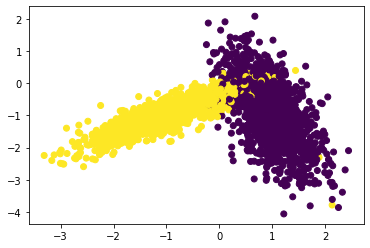

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
colors = {0:'red', 1:'blue'}
plt.scatter(X_test[:,0], X_test[:,1],c=y_test)
plt.show()

In [ ]:
#Ref
#https://moonbooks.org/Articles/How-to-create-a-list-of-tuples-with-random-numbers-in-python-/
#https://www.youtube.com/watch?v=8YJRtyx10vw
#https://stackoverflow.com/questions/61818704/building-a-custom-randomsearchcv-using-python
#https://machinelearningmastery.com/implement-resampling-methods-scratch-python/




def RandomSearchcv(x_train,y_train,classifier,param_range,folds):

  train_scores = []
  test_scores = []
  #print(x_train.shape,'Shape train')
  #print(y_train.shape,'Shape test')

  params = sorted(r.sample(range(1,param_range),10))
  print(params)

  # [1,2,3,4,5,6,7,8,9] --->  [[1, 2], [3, 4], [5, 6], [7, 8]]
  # Dividing the whole data to k group ie 3 grps
  x_train_group = []
  y_train_group = []
  step = int(len(X_train)/folds)

  for i in range(0,len(X_train),step):
    #print(i)
    x_train_group.append(X_train[i:i + step])
    y_train_group.append(y_train[i:i + step])

  #print(len(x_train_group),'thi')

  for parameter in tqdm(params):
    # Storing the  avg train and test accuracy for each parameter after cv
    train_score_fold = []
    test_score_fold = []


    # [[1, 2], [3, 4], [5, 6]] --->  train :[[1,2],[3,4]] cv [5,6]
    for group_num in range(len(x_train_group)):
      train_set_x = np.concatenate(x_train_group[:group_num] + x_train_group[group_num +1:])
      cv_set_x = x_train_group[group_num]
      train_set_y = np.concatenate(y_train_group[:group_num] + y_train_group[group_num +1:])
      cv_set_y =  y_train_group[group_num]

      #Fitting to model
      neigh.n_neighbors = parameter
      neigh.fit(train_set_x,train_set_y)

      train_pred = neigh.predict(train_set_x)
      train_score_fold.append(accuracy_score(train_set_y,train_pred))

      test_pred = neigh.predict(cv_set_x)
      test_score_fold.append(accuracy_score(cv_set_y,test_pred))
    
    train_scores.append(np.mean(train_score_fold))
    test_scores.append(np.mean(test_score_fold))
  
  return train_scores,test_scores,params



train,test,params = RandomSearchcv(X_train,y_train,neigh,50,3)
print(train)
print(test)

[1, 7, 12, 31, 34, 38, 40, 43, 47, 48]


100%|██████████| 10/10 [00:07<00:00,  1.31it/s]

[1.0, 0.9606666666666666, 0.9582666666666667, 0.9575333333333332, 0.9577999999999999, 0.9575333333333335, 0.9574666666666666, 0.9578000000000001, 0.9576666666666668, 0.9581333333333334]
[0.9302666666666667, 0.9528, 0.9556, 0.9557333333333333, 0.9564, 0.9561333333333334, 0.9565333333333333, 0.9571999999999999, 0.9570666666666666, 0.9568]


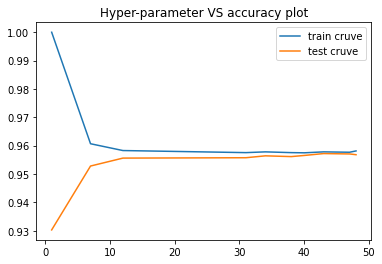

In [ ]:
plt.plot(params,train, label='train cruve')
plt.plot(params,test, label='test cruve')
plt.title('Hyper-parameter VS accuracy plot')
plt.legend()
plt.show()

In [ ]:
# understanding this code line by line is not that importent 
def plot_decision_boundary(X1, X2, y, clf):
        # Create color maps
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

    x_min, x_max = X1.min() - 1, X1.max() + 1
    y_min, y_max = X2.min() - 1, X2.max() + 1
    
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
    # Plot also the training points
    plt.scatter(X1, X2, c=y, cmap=cmap_bold)
    
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("2-Class classification (k = %i)" % (clf.n_neighbors))
    plt.show()

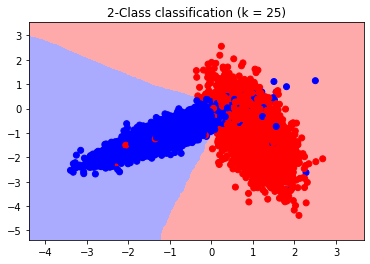

In [ ]:
from matplotlib.colors import ListedColormap
neigh = KNeighborsClassifier(n_neighbors = 25)
neigh.fit(X_train, y_train)
plot_decision_boundary(X_train[:, 0], X_train[:, 1], y_train, neigh)

# Implementing Custom RandomSearchCV

<pre>
def RandomSearchCV(x_train,y_train,classifier, param_range, folds):
    # x_train: its numpy array of shape, (n,d)
    # y_train: its numpy array of shape, (n,) or (n,1)
    # classifier: its typically KNeighborsClassifier()
    # param_range: its a tuple like (a,b) a < b
    # folds: an integer, represents number of folds we need to devide the data and test our model
    
    
    #1.generate 10 unique values(uniform random distribution) in the given range "param_range" and store them as "params" 
    # ex: if param_range = (1, 50), we need to generate 10 random numbers in range 1 to 50
    #2.devide numbers ranging from  0 to len(X_train) into groups= folds
    # ex: folds=3, and len(x_train)=100, we can devide numbers from 0 to 100 into 3 groups 
      group 1: 0-33, group 2:34-66, group 3: 67-100
    #3.for each hyperparameter that we generated in step 1:
        # and using the above groups we have created in step 2 you will do cross-validation as follows
        
        # first we will keep group 1+group 2 i.e. 0-66 as train data and group 3: 67-100 as test data, and find train and
          test accuracies
          
        # second we will keep group 1+group 3 i.e. 0-33, 67-100 as train data and group 2: 34-66 as test data, and find
          train and test accuracies
          
        # third we will keep group 2+group 3 i.e. 34-100 as train data and group 1: 0-33 as test data, and find train and
          test accuracies
        # based on the 'folds' value we will do the same procedure
        
        # find the mean of train accuracies of above 3 steps and store in a list "train_scores"
        # find the mean of test accuracies of above 3 steps and store in a list "test_scores"
    #4. return both "train_scores" and "test_scores"

#5. call function RandomSearchCV(x_train,y_train,classifier, param_range, folds) and store the returned values into "train_score", and "cv_scores"
#6. plot hyper-parameter vs accuracy plot as shown in reference notebook and choose the best hyperparameter
#7. plot the decision boundaries for the model initialized with the best hyperparameter, as shown in the last cell of reference notebook

</pre>

In [24]:
!wget -nc https://raw.githubusercontent.com/Bluedevil-hub/colab-to-pdf/master/colab_pdf.py
from colab_pdf import colab_pdf
colab_pdf('Assignment_4_Instructions.ipynb')

--2022-04-08 13:21:40--  https://raw.githubusercontent.com/Bluedevil-hub/colab-to-pdf/master/colab_pdf.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1864 (1.8K) [text/plain]
Saving to: ‘colab_pdf.py’

colab_pdf.py        100%[===================>]   1.82K  --.-KB/s    in 0s      

2022-04-08 13:21:41 (24.8 MB/s) - ‘colab_pdf.py’ saved [1864/1864]





Extracting templates from packages: 100%
[NbConvertApp] Converting notebook /content/drive/My Drive/Colab Notebooks/Assignment_4_Instructions.ipynb to pdf
[NbConvertApp] Support files will be in Assignment_4_Instructions_files/
[NbConvertApp] Making directory ./Assignment_4_Instructions_files
[NbConvertApp] Making directory ./Assignment_4_Instructions_files
[NbConvertApp] Making directory ./Assignment_4_In

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

'File ready to be Downloaded and Saved to Drive'